In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
df = pd.read_parquet(path="../Uber_Lyft_Cab_prices/df_final.parquet")

In [3]:
df.columns

Index(['distance', 'cab_type', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name', 'day', 'hour',
       'day_of_week', 'month', 'temp', 'clouds', 'pressure', 'rain',
       'humidity', 'wind'],
      dtype='object')

In [4]:
columns_to_remove = ["id", "name", "day"]

In [5]:
df_dummies = df.drop(columns=columns_to_remove)

In [6]:
one_hot_columns = ["cab_type", "destination", "source", "product_id", "day_of_week"]
df_dummies = pd.get_dummies(df_dummies, columns=one_hot_columns)

In [7]:
df_dummies.head()

,distance,price,surge_multiplier,hour,month,temp,clouds,pressure,rain,humidity,...,product_id_lyft_luxsuv,product_id_lyft_plus,product_id_lyft_premier,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
0,0.44,5.0,1.0,7,12,38.46,0.29,1022.25,0.0000,0.76,...,0,0,0,0,0,0,1,0,0,0
1,0.44,11.0,1.0,0,11,43.82,0.99,1002.59,0.0997,0.89,...,0,0,1,0,0,0,0,0,1,0
2,0.44,11.0,1.0,0,11,44.31,1.00,1003.17,0.1123,0.90,...,0,0,1,0,0,0,0,0,1,0
3,0.44,26.0,1.0,2,11,35.08,0.00,1013.71,0.0000,0.70,...,1,0,0,1,0,0,0,0,0,0
4,0.44,9.0,1.0,1,11,37.66,0.41,998.42,0.0000,0.71,...,0,1,0,0,0,0,0,1,0,0


In [8]:
X_train, X_test, y_train, y_test = train_test_split(df_dummies.drop(columns=["price"]), df_dummies["price"], test_size=0.2, random_state=123)

In [11]:
rf = RandomForestRegressor(random_state=123, n_jobs=-1)

In [12]:
model_fitted = rf.fit(X_train, y_train)

In [22]:
predictions = model_fitted.predict(X_test)
comparison = pd.DataFrame({"Real": y_test, "Predict": predictions})
comparison["r_squared"] = np.corrcoef(comparison["Real"], comparison["Predict"])[0, 1] ** 2
comparison["rmse"] = np.sqrt(mean_squared_error(comparison["Real"], comparison["Predict"]))
comparison["mae"] = np.abs(comparison["Real"] - comparison["Predict"]).mean()

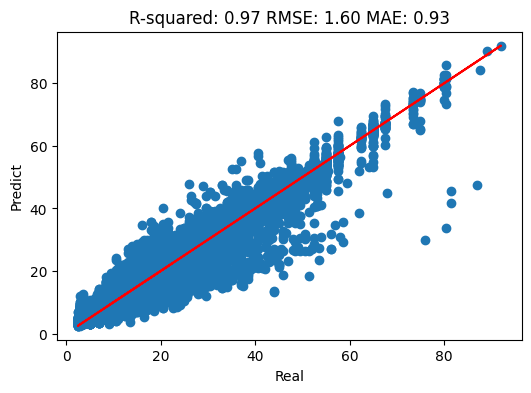

In [24]:
plt.figure(figsize=(6, 4))
plt.scatter(comparison["Real"], comparison["Predict"])
plt.plot(comparison["Real"], comparison["Real"], color="red")
plt.xlabel("Real")
plt.ylabel("Predict")
plt.title(f"R-squared: {comparison['r_squared'].mean():.2f} RMSE: {comparison['rmse'].mean():.2f} MAE: {comparison['mae'].mean():.2f}")
plt.show()

In [26]:
linear_reg = LinearRegression(n_jobs=-1)

In [33]:
linear_reg_fitted = linear_reg.fit(X_train, y_train)

In [34]:
predictions_linear = linear_reg_fitted.predict(X_test)
comparison_linear = pd.DataFrame({"Real": y_test, "Predict": predictions_linear})
comparison_linear["r_squared"] = np.corrcoef(comparison_linear["Real"], comparison_linear["Predict"])[0, 1] ** 2
comparison_linear["rmse"] = np.sqrt(mean_squared_error(comparison_linear["Real"], comparison_linear["Predict"]))
comparison_linear["mae"] = np.abs(comparison_linear["Real"] - comparison_linear["Predict"]).mean()

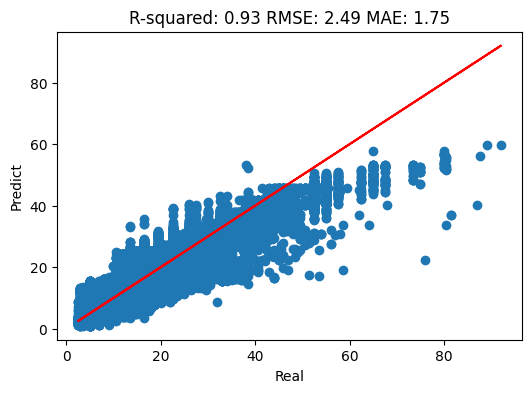

In [35]:
plt.figure(figsize=(6, 4))
plt.scatter(comparison_linear["Real"], comparison_linear["Predict"])
plt.plot(comparison_linear["Real"], comparison_linear["Real"], color="red")
plt.xlabel("Real")
plt.ylabel("Predict")
plt.title(f"R-squared: {comparison_linear['r_squared'].mean():.2f} RMSE: {comparison_linear['rmse'].mean():.2f} MAE: {comparison_linear['mae'].mean():.2f}")
plt.show()

In [37]:
coefficients = pd.DataFrame({"feature": X_train.columns, "coefficient": linear_reg_fitted.coef_})
coefficients["abs_coefficient"] = np.abs(coefficients["coefficient"])
coefficients.sort_values("abs_coefficient", ascending=False, inplace=True)
coefficients.head(60)

,feature,coefficient,abs_coefficient
11,cab_type_Uber,4.121834e+11,4.121834e+11
10,cab_type_Lyft,3.522009e+11,3.522009e+11
30,source_North End,2.351284e+11,2.351284e+11
29,source_Haymarket Square,2.351284e+11,2.351284e+11
33,source_South Station,2.351284e+11,2.351284e+11
27,source_Fenway,2.351284e+11,2.351284e+11
26,source_Boston University,2.351284e+11,2.351284e+11
32,source_Northeastern University,2.351284e+11,2.351284e+11
13,destination_Beacon Hill,-2.316892e+11,2.316892e+11
23,destination_West End,-2.316892e+11,2.316892e+11
